# Part I - Ford GoBike System Slideshow San Fransico Bay Area (February 2019)
## by Oke Oladunsi

## Table of Contents

<ul>
<li><a href="#intro">Brief Introduction</a></li>
<li><a href="#Preliminary Wrangling">reliminary Data Wrangling efforts </a></li>
<li><a href="#Feature Engineering">Feature Engineering</a></li>
<li><a href="#Features">Selecting Features to work on</a></li>
<li><a href="#Univariate Exploration">Univariate Exploration</a></li>
<li><a href="#Bivariate Exploration">Bivariate Exploration</a></li>
<li><a href="#Multivariate Exploration">Multivariate Exploration</a></li>

<li><a href="Conclusions">Conclusions</a></li>
<li><a href="./README.md">ReadMe Document</a></li>
<li><a href="./Part_II_slide_deck_template.slides.html">Slideshow</a></li>
</ul>



<a id='intro'></a>

## Introduction
> [Bay Wheels](https://en.wikipedia.org/wiki/Bay_Wheels) (previously known as Ford GoBike) is a regional public bike sharing system in the San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018. <br/><br/>The dataset used for this exploratory analysis consists of [This dataset includes information about individual rides made in a bike-sharing system covering the Francisco Bay area of travels for the month February year 2019](https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv) for February 2019 alone in CSV format covering the greater San Francisco Bay area, also available [here data for other cities](https://www.google.com/url?q=https://github.com/BetaNYC/Bike-Share-Data-Best-Practices/wiki/Bike-Share-Data-Systems&sa=D&source=editors&ust=1658866159905425&usg=AOvVaw1qw9vVQEFEiyG4jAwGQx1H).




<a id='Preliminary Wrangling'></a>

## Preliminary Wrangling

This data needs a little wrangling. so I would be changing some variables/features datatypes into appropriate ones using `astype` methed

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

### Gathering 

In [2]:
ride_data = pd.read_csv("201902_fordgobike_tripdata.csv")
ride_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes



### Assessing the data

In [3]:
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### Cleaning

#### Checking if there are duplicated rows 


In [4]:
ride_data.duplicated().sum()

0

#### Checking the amount of rows with empty values

In [5]:
# features with null values
null_columns = {}
for i in ride_data.columns.to_list():
    if ride_data[i].isnull().sum() > 0:
        null_columns[i] = ride_data[i].isnull().sum()
    else:
        pass
print(null_columns)

{'start_station_id': 197, 'start_station_name': 197, 'end_station_id': 197, 'end_station_name': 197, 'member_birth_year': 8265, 'member_gender': 8265}


<a id='Feature Engineering'></a>

#### Feature Engineering
 creating new columns that would be needed for visualizations

 #### Code

In [6]:
# Wrangling a little 
ride_data.dropna(inplace=True)
ride_data["member_birth_year"] = ride_data["member_birth_year"].astype("int")
ride_data["start_time"] = pd.to_datetime(ride_data["start_time"])
ride_data["end_time"] = pd.to_datetime(ride_data["end_time"])



##### More features are created

#### Code

In [7]:
# creating new colunms for time in year,month, day and hours
ride_data["year"] = ride_data["start_time"].dt.year
ride_data["month"] = ride_data["start_time"].dt.month
ride_data["days"] = ride_data["start_time"].dt.day
ride_data["boarding_hour"] = ride_data["start_time"].dt.hour


In [8]:
def getting_period_of_day(Hour):
    """ This function generates periods of the day from accepting numeric values in range 0-23 representing Morning-Afternoon-Evening-Night
    WHERE
    5am - 11am : Morning
    12am - 4pm : Afternoon
    5pm - 9pm : Evening
    10pm - 4am : Night
    """
    morning = [i for i in range(5,12)]
    afternoon = [i for i in range(12,17)]
    evening = [i for i in range(17,21)]
    night =  [i for i in range(21,24)] + [i for i in range(0,5)]

    if Hour in morning:
        return "morning"
    elif Hour in afternoon:
        return "afternoon"
    elif Hour in evening:
        return "evening"
    else:
        return "night"

In [9]:
def days(num):
    """ This function generates periods of the day from accepting numeric values in range 0-6 representing Sun- Sat
    WHERE
    0 : Sunday
    1 : Monday
    2 : Tuesday
    3 : Wednesday
    4 : Thursday
    5 : Friday
    6 : Saturday

    """
    days = {0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}
    return days.get(num)

In [10]:
ride_data["period_of_day"] = ride_data["boarding_hour"].apply(lambda x: getting_period_of_day(x))
ride_data["day_of_week"] = ride_data["start_time"].dt.weekday.apply(lambda x: days(x))

***NB:*** The essence of the feature engineering done above to enable be provide insights into how to be effectively maximise both human and non-human resources to increase profit and at the same time provide premium bike sharing service

#### Test

In [11]:
ride_data["year"].value_counts()

2019    174952
Name: year, dtype: int64

- this is an affirmation that we only have data of the year 2019
- the code block below shows that it only for the month of `  ` `  FEBRUARY`

In [12]:
ride_data["month"].value_counts()

2    174952
Name: month, dtype: int64

In [13]:
# pragrammatically assessing the data
ride_data["period_of_day"].value_counts()

morning      65252
evening      52657
afternoon    46114
night        10929
Name: period_of_day, dtype: int64

- from the above cell we can see that in all our stations we have more rides in morning
- the night has the least travel

In [14]:
ride_data["day_of_week"].value_counts()

Wednesday    33712
Monday       30584
Tuesday      28426
Thursday     27663
Sunday       25641
Saturday     14512
Friday       14414
Name: day_of_week, dtype: int64

- the cell above shows that people travel most on wednesday
- Friday has the least amount of travel 

In [15]:
# confirming if there is the stations in the start_station_name are the same as the ones in the end_station_name 
sorted(ride_data["start_station_name"].value_counts().index) == sorted(ride_data["end_station_name"].value_counts().index)


True

- confirming if the same stations in the start stations(onboarding) are all present in the end stations(alighting)

In [16]:
ride_data["member_gender"].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

- the amount of rides taken by men are 3x that of women and  35x that of Other genders

In [17]:
ride_data["user_type"].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

- occassionally we have riders that aren't subcribers making used of the service but subcribers are significantly more that occassional riders
<br/> we can probe how long occasional riders spend using the service compared to subscribers

In [18]:
ride_data["bike_share_for_all_trip"].value_counts()

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

- this shows that most riders don't like the idea of sharing the rides with other users

### Code

In [19]:
ride_data["age"] = 2019 - ride_data["member_birth_year"]

### Code

In [20]:
ride_data["user_type"] = ride_data["user_type"].astype("category")
ride_data["member_gender"] = ride_data["member_gender"].astype("category")
ride_data["boarding_hour"] = ride_data["boarding_hour"].astype("category")
ride_data["period_of_day"] = ride_data["period_of_day"].astype("category")
ride_data["day_of_week"] = ride_data["day_of_week"].astype("category")

In [21]:
ride_data["start_station_id"] =ride_data["start_station_id"].astype('str')
ride_data["end_station_id"] = ride_data["end_station_id"].astype('str')
ride_data["bike_id"] =ride_data["bike_id"].astype('str')


### Test

In [22]:
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

<a id='Features'></a>
### What is the structure of your dataset?

> This dataset initially consists of a total of 183412 rows and 16 columns where six of th 16 columns are having null values you can check the cell above for the amount of null entries for each feature. Then after I had wrangled the data it has reduced to 174952 rows and the columns increased to 21 columns. This dataset is for rides in the month of **february 2019**

### What is/are the main feature(s) of interest in your dataset?

>   I'm most interested in exploring the bike trips' duration and rental events occurrance patterns, along with how these relate to the riders' characteristics, i.e. their user type, gender, age, etc, to get a sense of how and what people are using the bike sharing service for. Sample questions to answer: When are most trips taken in terms of time of day, day of the week, or month of the year? How long does the average trip take? Does the above depend on if a user is a subscriber or customer?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> `member_birth_year`,` start_station_latitude`,` start_station_longitude`,` end_station_latitude`,` start_station_latitude` are features i think i will be needing for this visualizations though I might probably create new ones to support these one I currently have.


In [23]:
numeric_colunms = ["duration_sec","start_station_latitude","start_station_longitude","end_station_latitude","end_station_longitude","age",]
categorical_columns = ["user_type","member_gender","period_of_day","day_of_week"]

<a id='Univariate Exploration'></a>
## Univariate Exploration


In [24]:
ride_data.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,year,month,days,age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.0,174952.0,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135,2019.0,2.0,15.312337,34.196865
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731,0.0,0.0,8.033926,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,2019.0,2.0,1.000000,18.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,2019.0,2.0,8.000000,27.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000,2019.0,2.0,15.000000,32.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000,2019.0,2.0,22.000000,39.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,2019.0,2.0,28.000000,141.000000


#### Checking how correlated each numeric columns are to each other

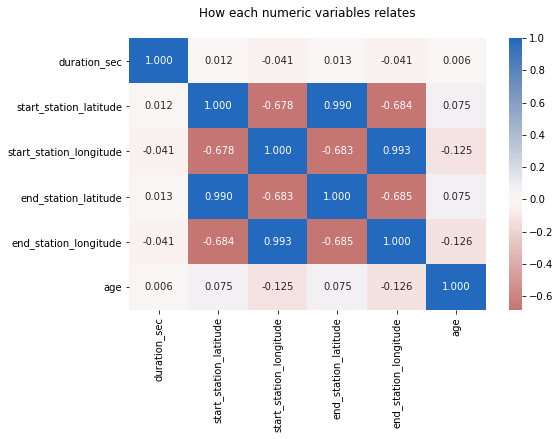

In [80]:
def show_numeric_datapoints_corr():
        plt.figure(figsize = [8, 5])
        sb.heatmap(ride_data[numeric_colunms].corr(), annot = True, fmt = '.3f',
                cmap = 'vlag_r', center = 0)
        plt.title("How each numeric variables relates\n")
        plt.show()
        

show_numeric_datapoints_corr()

- just exploring visually how correlated each numeric columns are to each other

In [26]:
np.arange(100,2000+100,100)//60

array([ 1,  3,  5,  6,  8, 10, 11, 13, 15, 16, 18, 20, 21, 23, 25, 26, 28,
       30, 31, 33])

In [25]:
ride_data["travelTime_minutes"] = ride_data["duration_sec"]//60
ride_data["travelTime_hours"] = ride_data["duration_sec"]//(60**2)

#### What is the distribution of travel time and ages of riders
- are they normally distribute or skewed?

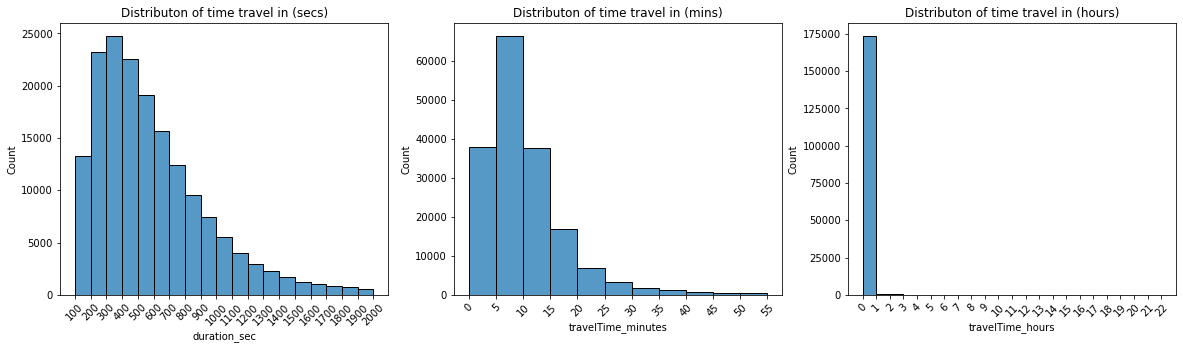

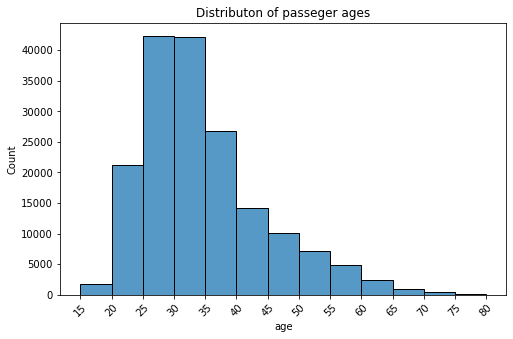

In [28]:
def numeric_plots():
    plt.figure(figsize=[20,5])

    plt.subplot(1,3,1)
    bins = np.arange(100,2000+100,100)
    sb.histplot(data=ride_data,x ="duration_sec",bins=bins);
    plt.xticks(bins,rotation=45)
    plt.title("Distributon of time travel in (secs)")  

    plt.subplot(1,3,2)
    min_bins = np.arange(0,60,5)
    sb.histplot(data=ride_data,x ="travelTime_minutes",bins=min_bins);
    plt.xticks(min_bins,rotation=45)
    plt.title("Distributon of time travel in (mins)")

    plt.subplot(1,3,3)
    hour_bins = np.arange(0,ride_data["travelTime_hours"].max(),1)
    sb.histplot(data=ride_data,x ="travelTime_hours",bins=hour_bins);
    plt.xticks(hour_bins,rotation=45)
    plt.title("Distributon of time travel in (hours)")

    plt.figure(figsize=[8,5])
    bins = np.arange(15,80+5,5)
    sb.histplot(data=ride_data,x ="age",bins=bins);
    plt.xticks(bins,rotation=45)
    plt.title("Distributon of passeger ages")


numeric_plots()

In [29]:
ride_data["travelTime_hours"].value_counts()

0     173566
1        848
2        208
3         91
4         46
5         35
9         17
6         17
7         13
14        13
17        13
8         12
13        11
10        10
12         9
19         7
15         7
20         6
11         6
18         5
16         5
23         4
22         3
Name: travelTime_hours, dtype: int64

In [30]:
new= ride_data["travelTime_minutes"].value_counts().to_frame()[:20]
new["percent"] = ride_data["travelTime_minutes"].value_counts()[:20]/ride_data["travelTime_minutes"].value_counts()[:30].sum()


In [31]:
ride_data[ride_data["travelTime_minutes"] < 2]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,year,month,days,boarding_hour,period_of_day,day_of_week,age,travelTime_minutes,travelTime_hours
43,116,2019-02-28 23:44:00.988,2019-02-28 23:45:57.482,104.0,4th St at 16th St,37.767045,-122.390833,93.0,4th St at Mission Bay Blvd S,37.770407,...,No,2019,2,28,23,night,Wednesday,60,1,0
72,113,2019-02-28 23:26:28.335,2019-02-28 23:28:21.625,163.0,Lake Merritt BART Station,37.797320,-122.265320,163.0,Lake Merritt BART Station,37.797320,...,No,2019,2,28,23,night,Wednesday,44,1,0
85,73,2019-02-28 23:17:06.483,2019-02-28 23:18:19.711,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,80.0,Townsend St at 5th St,37.775235,...,No,2019,2,28,23,night,Wednesday,24,1,0
128,71,2019-02-28 22:59:32.741,2019-02-28 23:00:44.152,280.0,San Fernando St at 7th St,37.337122,-121.883215,310.0,San Fernando St at 4th St,37.335885,...,Yes,2019,2,28,22,night,Wednesday,24,1,0
251,83,2019-02-28 22:16:36.506,2019-02-28 22:17:59.632,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,263.0,Channing Way at San Pablo Ave,37.862827,...,No,2019,2,28,22,night,Wednesday,24,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183252,94,2019-02-01 06:14:43.739,2019-02-01 06:16:18.130,350.0,8th St at Brannan St,37.771431,-122.405787,79.0,7th St at Brannan St,37.773492,...,No,2019,2,1,6,morning,Thursday,24,1,0
183305,100,2019-02-01 04:46:54.805,2019-02-01 04:48:34.843,80.0,Townsend St at 5th St,37.775235,-122.397437,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,No,2019,2,1,4,night,Thursday,69,1,0
183345,98,2019-02-01 02:09:43.393,2019-02-01 02:11:22.174,133.0,Valencia St at 22nd St,37.755213,-122.420975,127.0,Valencia St at 21st St,37.756708,...,No,2019,2,1,2,night,Thursday,20,1,0
183395,95,2019-02-01 00:37:23.115,2019-02-01 00:38:58.346,276.0,Julian St at The Alameda,37.332233,-121.912516,277.0,Morrison Ave at Julian St,37.333658,...,Yes,2019,2,1,0,night,Thursday,26,1,0


In [32]:
new["travelTime_minutes"].sum()/ride_data.shape[0]

0.9187777218894325

In [33]:
ride_data[ride_data["travelTime_hours"] == ride_data["travelTime_hours"].max()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,year,month,days,boarding_hour,period_of_day,day_of_week,age,travelTime_minutes,travelTime_hours
5203,83195,2019-02-27 14:47:23.181,2019-02-28 13:53:58.433,243.0,Bancroft Way at College Ave,37.869360,-122.254337,248.0,Telegraph Ave at Ashby Ave,37.855956,...,Yes,2019,2,27,14,afternoon,Tuesday,57,1386,23
85465,84548,2019-02-16 15:48:25.029,2019-02-17 15:17:33.080,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,...,No,2019,2,16,15,afternoon,Friday,38,1409,23
112435,83407,2019-02-11 16:25:33.069,2019-02-12 15:35:40.956,77.0,11th St at Natoma St,37.773507,-122.416040,344.0,16th St Depot,37.766349,...,No,2019,2,11,16,afternoon,Sunday,31,1390,23
127999,83519,2019-02-09 15:16:17.537,2019-02-10 14:28:17.270,72.0,Page St at Scott St,37.772406,-122.435650,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,No,2019,2,9,15,afternoon,Friday,29,1391,23


- the plot above shows the distribution of duration in sec and we can see that the distrubtion is rigth skewed and most people spend between travel 200-600ses to get to their various destinations

- Usually most rides take about 20mins ride from a station to another and while the travel time in hours shows that usually the time during rides are <br/>within one hour from boarding station to alighting station

- the second plot shows that most people that uses the ride services are within the ages of 25-40. while the maximum age of 141 we saw in our describe probably is an outlier.
- after careful examination of the duration sec column we could see that some ride last for 23 hour which is actually strange which will make me try to visualize duration of travel in hours.
##
**NB:**  What could cause the large travel time in the dataset. Therefore from now on I wiill based my visuaizations on rides withing one hour

In [26]:
ride_data = ride_data[ride_data["travelTime_hours"] <= 60]

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64


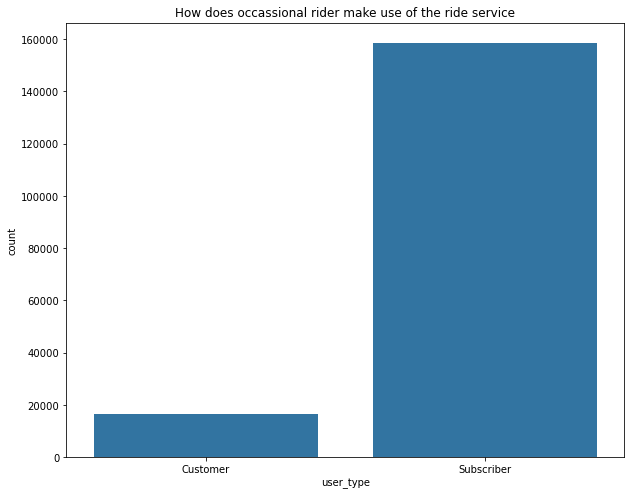

In [27]:
def rider_share():
    plt.figure(figsize=[10,8])
    base_color = sb.color_palette()[0]
    sb.countplot(data=ride_data,x="user_type",color=base_color)
    plt.title("How does occassional rider make use of the ride service")

    print(ride_data.user_type.value_counts())
rider_share()

- Above we see that we have more subscribers of about (10x more) using the ride service than occassional custormers 

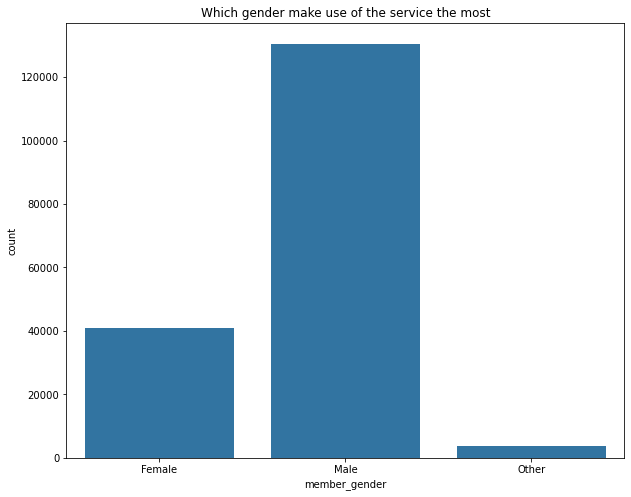

In [36]:
def gender():
    plt.figure(figsize=[10,8])
    base_color = sb.color_palette()[0]
    sb.countplot(data=ride_data,x="member_gender",color = base_color)
    plt.title("Which gender make use of the service the most")
gender()

- the dataset shows that we have more males making use of the service than other genders

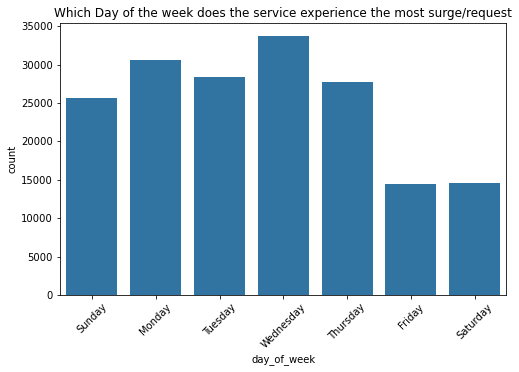

In [37]:
def observing_Week_days():
    plt.figure(figsize=[8,5])
    base_color = sb.color_palette()[0]
    weekday = [ 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    sb.countplot(data=ride_data,x="day_of_week",color=base_color,order=weekday)
    plt.xticks(rotation=45)
    plt.title("Which Day of the week does the service experience the most surge/request")

observing_Week_days()

- The dataset shows that less people use the bike share service during the weekend espectially on staurdays and sundays while wednesday is when people travels the most

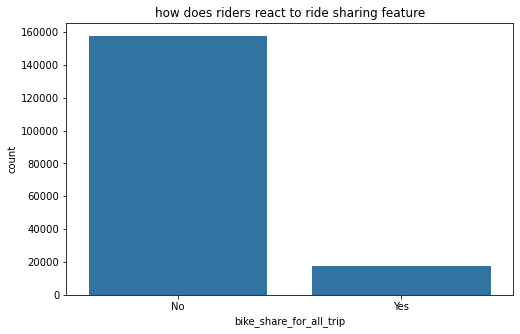

In [38]:
def get_share():
    plt.figure(figsize=[8,5])
    base_color = sb.color_palette()[0]
    sb.countplot(data=ride_data,x="bike_share_for_all_trip",color=base_color)
    plt.title("how does riders react to ride sharing feature")

get_share()

- I was expecting more riders not wanting not sharing the rides because from the previous chart we had more men using the platform to travel and men have the tendecy to need privacy more than females and other genders

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>  The duration_sec is not normally distributed but skewed. Then I create new feature travel_minutes to enable me observe it more closely which shows that the majority of the members did not use bike share for all of their trips, and most were around 25 to 40 years old. Most rides were quick and short, lasted between 5 to 10 minutes, that some riders travel time is close to 23hrs which is not normal.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, travelTime_hour shows that 99% of rides are within 1hr and about 91% of these rides are within 20mins. there are some features that have unusual distributions like the ages of rides that holds a values of 141 years that seems odd.

<a id='Bivariate Exploration'></a>
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [39]:
ride_data[ride_data["travelTime_minutes"] > 660]["day_of_week"].value_counts()

Sunday       15
Tuesday      15
Friday       14
Saturday     12
Monday       11
Thursday     11
Wednesday    11
Name: day_of_week, dtype: int64

/home/oldunsi/anaconda3/envs/Iqube/lib/python3.7/site-packages/seaborn/axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
/home/oldunsi/anaconda3/envs/Iqube/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/oldunsi/anaconda3/envs/Iqube/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/oldunsi/anaconda3/envs/Iqube/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWa

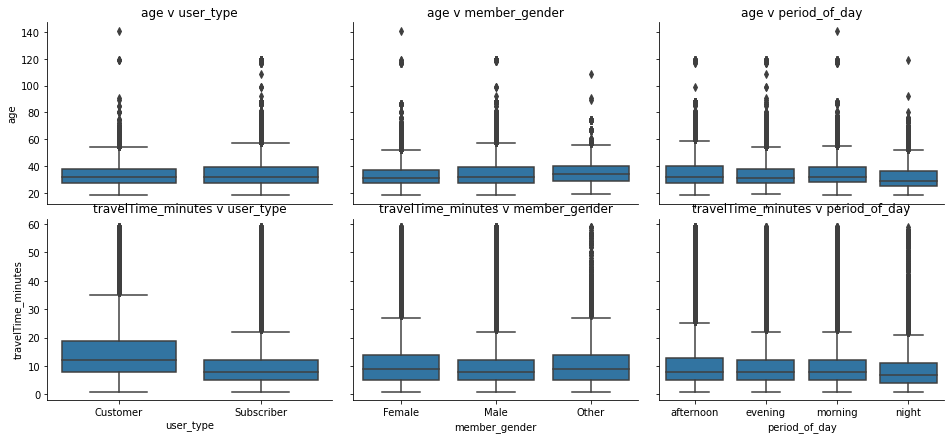

In [85]:
one__hour = ride_data[ride_data["travelTime_minutes"] < 60]
def categorical__timeTravel(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    
    sb.boxplot(x, y, color = default_color)
    plt.title("{} v {}".format(y.name,x.name))



g = sb.PairGrid(data = one__hour, y_vars =[ 'age','travelTime_minutes'], x_vars = ["user_type","member_gender","period_of_day"],
                size = 3, aspect = 1.5)
g.map(categorical__timeTravel)
plt.show();


/home/oldunsi/anaconda3/envs/Iqube/lib/python3.7/site-packages/seaborn/axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
/home/oldunsi/anaconda3/envs/Iqube/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/oldunsi/anaconda3/envs/Iqube/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/oldunsi/anaconda3/envs/Iqube/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWa

<Figure size 1440x1080 with 0 Axes>

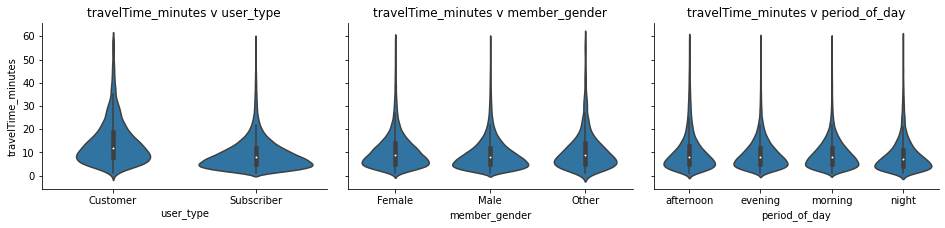

In [40]:
def more_categorical__timeTravel(x,y, **kwargs):
    """ Quick hack for creating violin plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.violinplot(x, y, color = default_color)
    plt.title("{} v {}".format(y.name,x.name))


g = sb.PairGrid(data = one__hour, y_vars ="travelTime_minutes", x_vars = ["user_type","member_gender","period_of_day"],
                size = 3, aspect = 1.5)
plt.figure(figsize = [20, 15])
g.map(more_categorical__timeTravel)
plt.show();

 **NB** This chart above are for rides within One hour (1h)
- we can see that there are no significant difference in the avagrage age of customer and subscribers
- yet there is a slightly higher age difference in other genders compared to both male and female
- finally on ages, we can see that younger people travel more at night.

#####
- we can see that there is significant difference in the avagrage time travel by customer(13mins) and subscribers(8mins). where is seems subscribers tend to know where they going hereby reducing travel time.
- men tend to travel on the average than other genders
- finally people that travel at night which are most young people have a specific place they are going to  by the fact that average rides spend less than 10mins to their destinations. 

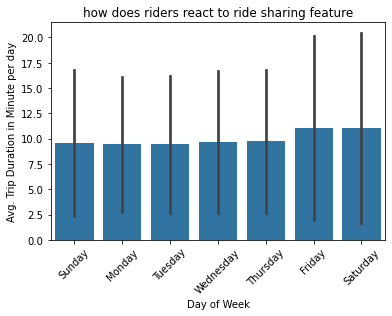

In [42]:
def riders__weekdays():
    base_color = sb.color_palette()[0]
    weekday = [ 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    sb.barplot(data=one__hour, x='day_of_week', y='travelTime_minutes',ci='sd', color=base_color,order=weekday);
    plt.xlabel('Day of Week');
    plt.ylabel('Avg. Trip Duration in Minute per day');
    plt.xticks(rotation=45)
    plt.title("how does riders react to ride sharing feature")

riders__weekdays()

- the chart above shows that people travel time from monday through thursday are within 10 mins but on friday and saturday the avg time goes above 10 mins which occassionaly goes above 15 min but not more than 17mins. Yet during the weekends we have some rides that goes beyond 17mins int 20mins 



In [43]:
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

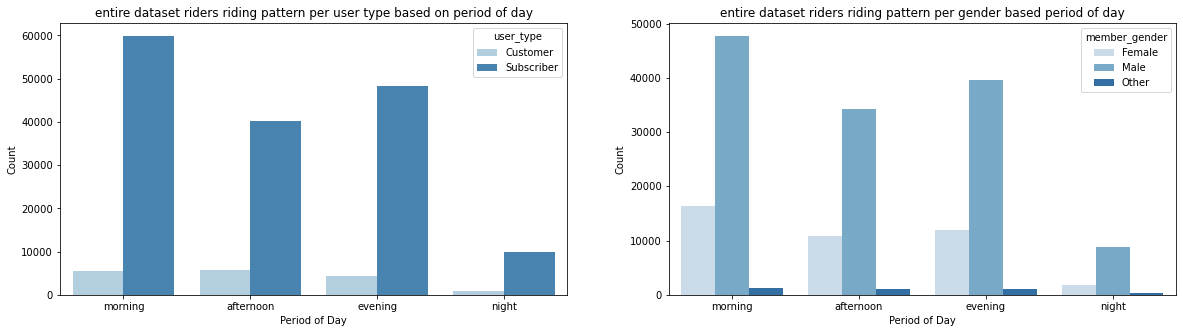

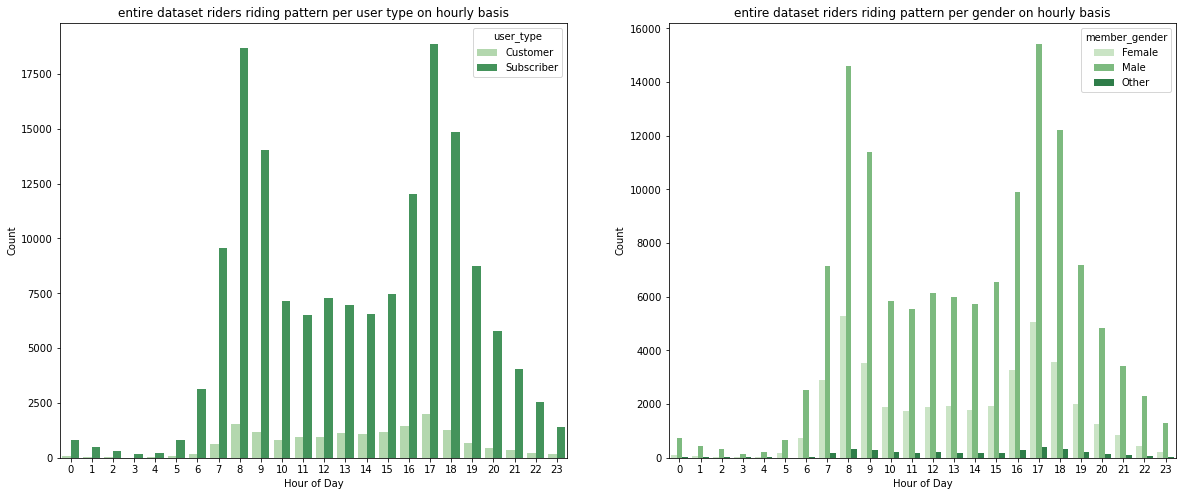

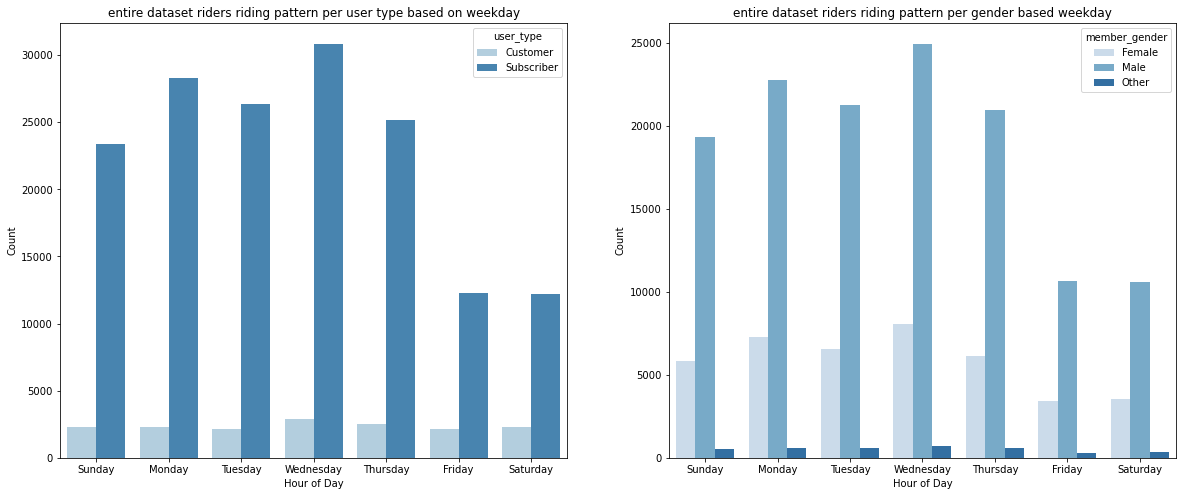

In [79]:
def more_insight_on_riders_behavour():
    plt.figure(figsize = [20, 5])
    period = ["morning","afternoon","evening","night"]
    plt.subplot(1,2,1)
    sb.countplot(data=ride_data, x='period_of_day',palette="Blues",hue="user_type", order=period);
    plt.xlabel('Period of Day');
    plt.ylabel('Count');
    plt.title("entire dataset riders riding pattern per user type based on period of day")

    plt.subplot(1,2,2)
    sb.countplot(data=ride_data, x='period_of_day',palette="Blues",hue="member_gender",order=period);
    plt.xlabel('Period of Day');
    plt.ylabel('Count');
    plt.title("entire dataset riders riding pattern per gender based period of day")

    plt.figure(figsize = [20, 8])
    plt.subplot(1,2,1)
    sb.countplot(data=ride_data, x='boarding_hour',hue="user_type",palette="Greens");
    plt.xlabel('Hour of Day');
    plt.ylabel('Count');
    plt.title("entire dataset riders riding pattern per user type on hourly basis")

    plt.subplot(1,2,2)
    sb.countplot(data=ride_data, x='boarding_hour',hue="member_gender",palette="Greens");
    plt.xlabel('Hour of Day');
    plt.ylabel('Count');
    plt.title("entire dataset riders riding pattern per gender on hourly basis")


    weekday = [ 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    

    plt.figure(figsize = [20, 8])
    plt.subplot(1,2,1)
    sb.countplot(data=ride_data, x='day_of_week',hue="user_type",palette="Blues",order=weekday);
    plt.xlabel('Hour of Day');
    plt.ylabel('Count');
    plt.title("entire dataset riders riding pattern per user type based on weekday")

    plt.subplot(1,2,2)
    sb.countplot(data=ride_data, x='day_of_week',hue="member_gender",palette="Blues",order=weekday);
    plt.xlabel('Hour of Day');
    plt.ylabel('Count');
    plt.title("entire dataset riders riding pattern per gender based weekday")


    

more_insight_on_riders_behavour()

- The first row of chart show that on any day of week we tend to have more subscriber using the service in the morning than at any period of the day. the visuals also shows that the distribution varies from subscriber to occassional customers where customers tend to use the service less in the evening than in the afternoon but subscribers use the service more in the evening than in the afternoon. on the second chart of the first row we can see that there seem to identical distribution for male and female but other genders seems to have constant trend through morning till evening but reduced at night.
- The busiest hours are pretty much consistent throughout the month with rush hours occuring around 8AM and 5PM.
- Wednesday is the day the ride service is used the most and during the weekend there is a constant reduction of usage.



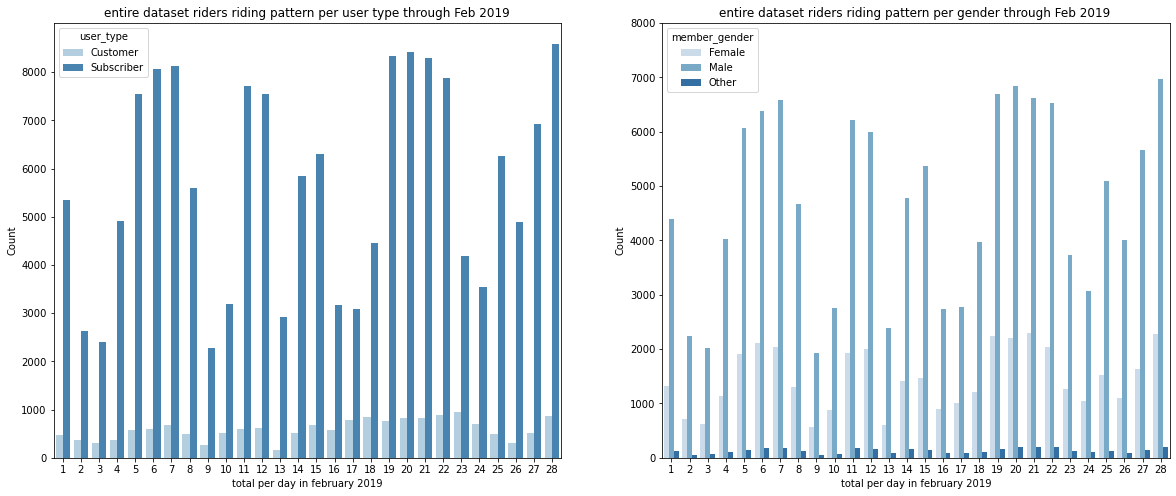

In [78]:
def rides_in_feb():
    plt.figure(figsize = [20, 8])
    plt.subplot(1,2,1)
    sb.countplot(data=ride_data, x='days',hue="user_type",palette="Blues");
    plt.xlabel('total per day in february 2019');
    plt.ylabel('Count');
    plt.yticks(np.arange(0,9000,1000),np.arange(0,9000,1000))
    plt.title("entire dataset riders riding pattern per user type through Feb 2019")

    plt.subplot(1,2,2)
    sb.countplot(data=ride_data, x='days',hue="member_gender",palette="Blues");
    plt.xlabel('total per day in february 2019');
    plt.ylabel('Count');
    plt.yticks(np.arange(0,9000,1000),np.arange(0,9000,1000))
    plt.title("entire dataset riders riding pattern per gender through Feb 2019 ")

rides_in_feb()

- throught the month customers seems to be more constitent in the usage the service than subscribers
- the distribution of rides shows that female riders have a normally distributed shape than other genders

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There are a lot more subscriber usage than customers. The riding habit/pattern varies a lot between subscribers and customers. <br/>Subscribers use the bike sharing system for work commnute thus most trips were on work days (Mon-Fri) and especially during rush hours <br/>(when going to work in the morning (8am) and getting off work in the evening (5pm)).
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is significant difference in the avagrage time travel by customer(13mins) and subscribers(8mins). where is seems subscribers tend to know where they going hereby reducing travel time.

> People travel time from monday through thursday are within 10 mins but on friday and saturday the avg time goes above 10 mins which occassionaly goes above 15 min but not more than 17mins. Yet during the weekends we have some rides that goes beyond 17mins int 20mins 

> 

<a id='Multivariate Exploration'></a>
## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [45]:
weekday = [ 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
period = ["morning","afternoon","evening","night"]

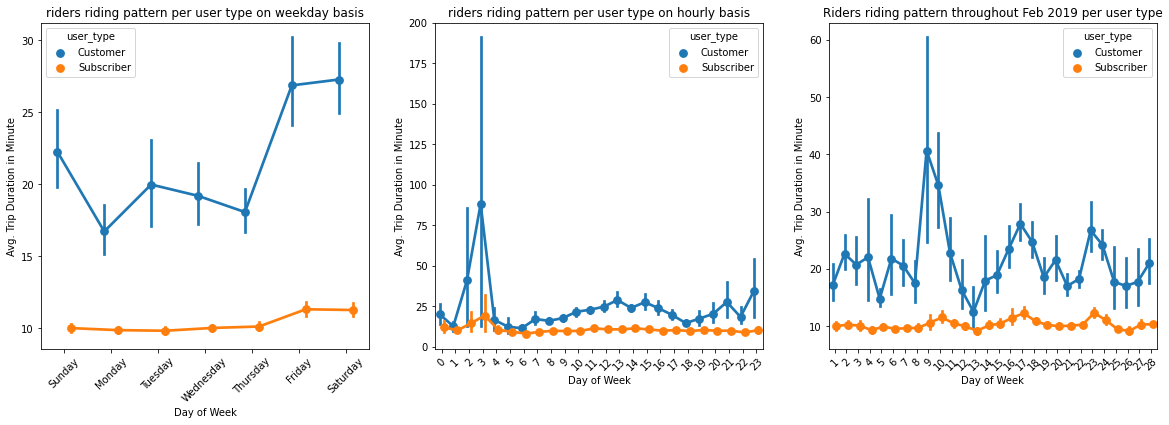

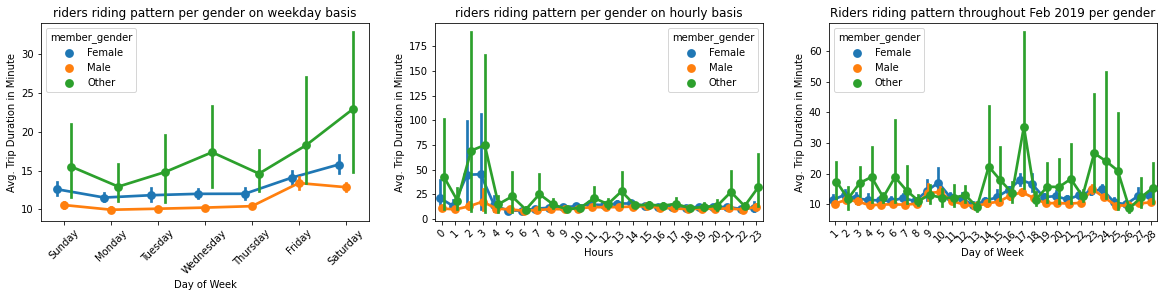

In [56]:
def multivariate():
    
    plt.figure(figsize = [20,6])
    plt.subplot(1,3,1)
    sb.pointplot(data=ride_data, x='day_of_week', y='travelTime_minutes', hue='user_type', dodge=0.3, linestyles="-",order=weekday);
    plt.xlabel('Day of Week');
    plt.ylabel('Avg. Trip Duration in Minute');
    plt.xticks(rotation=45)
    plt.title("riders riding pattern per user type on weekday basis")

    plt.subplot(1,3,2)
    sb.pointplot(data=ride_data, x='boarding_hour', y='travelTime_minutes', hue='user_type', dodge=0.3, linestyles="-");
    plt.xlabel('Day of Week');
    plt.ylabel('Avg. Trip Duration in Minute');
    plt.xticks(rotation=45)
    plt.title("riders riding pattern per user type on hourly basis")


    plt.subplot(1,3,3)
    sb.pointplot(data=ride_data, x='days', y='travelTime_minutes', hue='user_type', dodge=0.3, linestyles="-");
    plt.xlabel('Day of Week');
    plt.ylabel('Avg. Trip Duration in Minute');
    plt.xticks(rotation=45)
    plt.title("Riders riding pattern throughout Feb 2019 per user type")



    
    plt.figure(figsize = [20, 8])
    plt.subplot(2,3,1)
    sb.pointplot(data=ride_data, x='day_of_week', y='travelTime_minutes', hue='member_gender', dodge=0.3, linestyles="-",order=weekday);
    plt.xlabel('Day of Week');
    plt.ylabel('Avg. Trip Duration in Minute');
    plt.xticks(rotation=45)
    plt.title("riders riding pattern per gender on weekday basis")

    plt.subplot(2,3,2)
    sb.pointplot(data=ride_data, x='boarding_hour', y='travelTime_minutes', hue='member_gender', dodge=0.3, linestyles="-");
    plt.xlabel('Hours');
    plt.ylabel('Avg. Trip Duration in Minute');
    plt.xticks(rotation=45)
    plt.title("riders riding pattern per gender on hourly basis")


    plt.subplot(2,3,3)
    sb.pointplot(data=ride_data, x='days', y='travelTime_minutes', hue='member_gender', dodge=0.3, linestyles="-");
    plt.xlabel('Day of Week');
    plt.ylabel('Avg. Trip Duration in Minute');
    plt.xticks(rotation=45)
    plt.title("Riders riding pattern throughout Feb 2019 per gender")

    
    

    
#     
multivariate()

- We see that both subcribers and customers riders spend more time riding from thursday through saturday but subcribers are consistent with the 10mins travel from Sun-Wed,whereas customers tend to ride for fun in the afternoon or early evenings over weekends. 

- like I was expecting, people that don't have a subcription plan tend to spend more time riding.

- That dataset also shows that even though all genders incresed their travel time during weekend male riders travel time reduces by saturday
- we can see that other genders spend more time riding towards the end of the month


#### We have been looking at the entire dataset since, But What about checking out how Younger riders riding patterns differs from older riders
- The charts below should be able to give insights into the each categories of people.
> - Young riders are within the ages of 18yrs-40yrs<br/> 
> - Older riders are are within the ages of 60yrs and above

In [54]:
ride_youth = ride_data[ride_data["age"].isin(np.arange(18,40,1))]

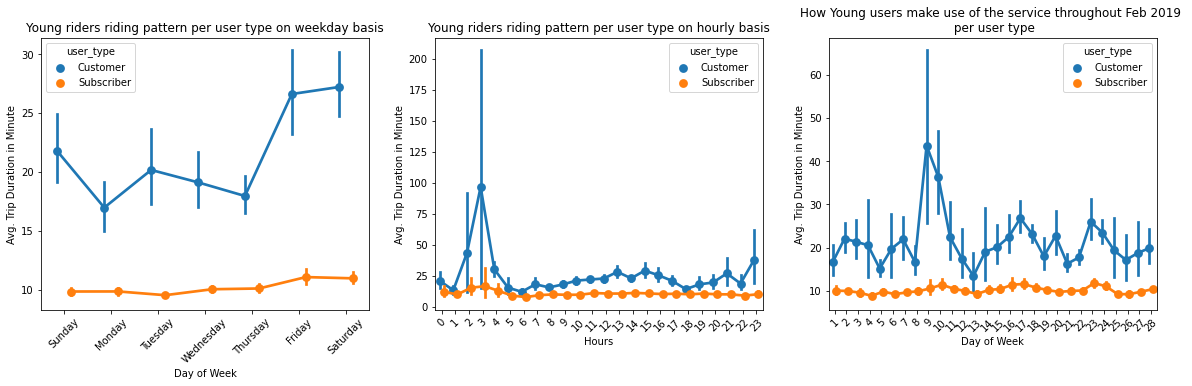

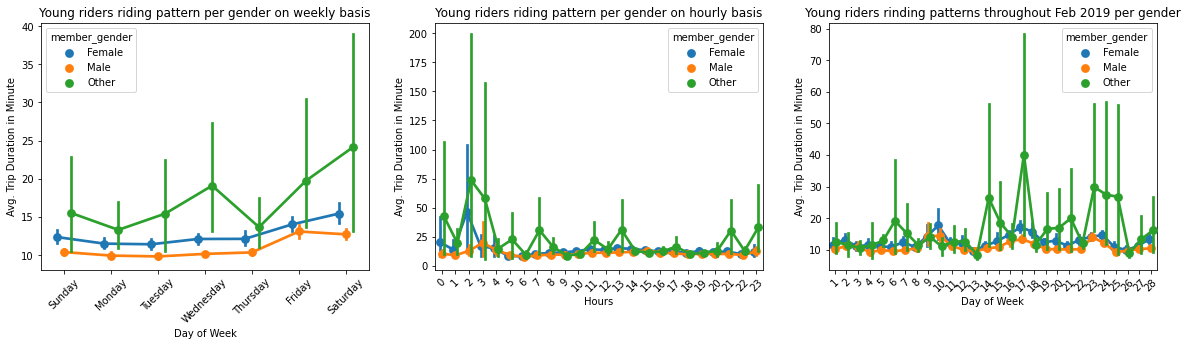

In [77]:
def youthriders():
    plt.figure(figsize = [20,5])
    plt.subplot(1,3,1)
    sb.pointplot(data=ride_youth, x='day_of_week', y='travelTime_minutes', hue='user_type', dodge=0.3, linestyles="-",order=weekday);
    plt.xlabel('Day of Week');
    plt.ylabel('Avg. Trip Duration in Minute');
    plt.xticks(rotation=45)
    plt.title("Young riders riding pattern per user type on weekday basis")

    plt.subplot(1,3,2)
    sb.pointplot(data=ride_youth, x='boarding_hour', y='travelTime_minutes', hue='user_type', dodge=0.3, linestyles="-");
    plt.xlabel('Hours');
    plt.ylabel('Avg. Trip Duration in Minute');
    plt.xticks(rotation=45)
    plt.title("Young riders riding pattern per user type on hourly basis")


    plt.subplot(1,3,3)
    sb.pointplot(data=ride_youth, x='days', y='travelTime_minutes', hue='user_type', dodge=0.3, linestyles="-");
    plt.xlabel('Day of Week');
    plt.ylabel('Avg. Trip Duration in Minute');
    plt.xticks(rotation=45)
    plt.title("How Young users make use of the service throughout Feb 2019 \n per user type")

    plt.figure(figsize = [20,10])
    plt.subplot(2,3,1)
    sb.pointplot(data=ride_youth, x='day_of_week', y='travelTime_minutes', hue='member_gender', dodge=0.3, linestyles="-",order=weekday);
    plt.xlabel('Day of Week');
    plt.ylabel('Avg. Trip Duration in Minute');
    plt.xticks(rotation=45)
    plt.title("Young riders riding pattern per gender on weekly basis")

    plt.subplot(2,3,2)
    sb.pointplot(data=ride_youth, x='boarding_hour', y='travelTime_minutes', hue='member_gender', dodge=0.3, linestyles="-");
    plt.xlabel('Hours');
    plt.ylabel('Avg. Trip Duration in Minute');
    plt.xticks(rotation=45)
    plt.title("Young riders riding pattern per gender on hourly basis")


    plt.subplot(2,3,3)
    sb.pointplot(data=ride_youth, x='days', y='travelTime_minutes', hue='member_gender', dodge=0.3, linestyles="-");
    plt.xlabel('Day of Week');
    plt.ylabel('Avg. Trip Duration in Minute');
    plt.xticks(rotation=45)
    plt.title("Young riders rinding patterns throughout Feb 2019 per gender")

    
youthriders()

##### ***NB:*** The chart of youth riding pattern and that of the general looks the same.
- user within the ages of 18-40 spend about 10mins on average subscribers in 24hrs
- on the weekly chart we can see that the youth trend is similar to that of the whole data where both subcribers and customers spend more travel time riding during the weekends
- throughout the month of february young subcribers spend about 10mins on riding to their destinations but customers are travel time is not constant.


In [49]:
weekend_ride = ride_data[ride_data["day_of_week"].isin(['Friday', 'Saturday'])]
prop = weekend_ride["member_gender"].value_counts()/weekend_ride["member_gender"].value_counts().sum()


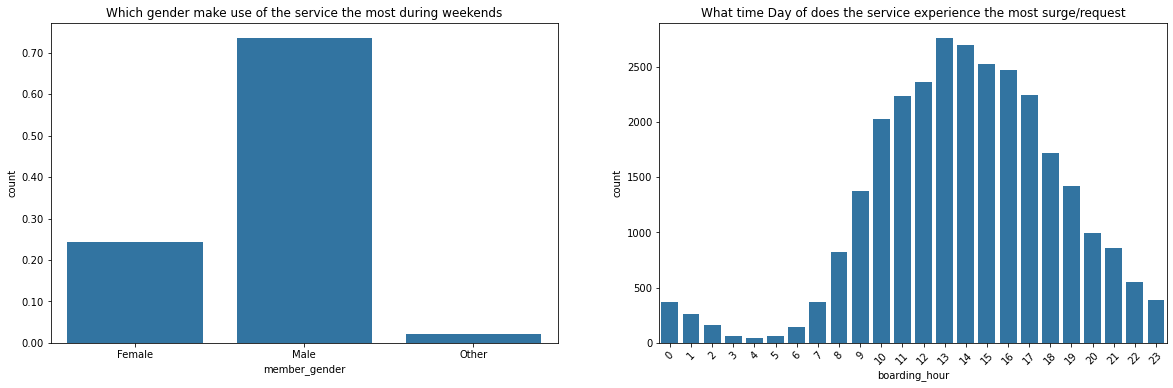

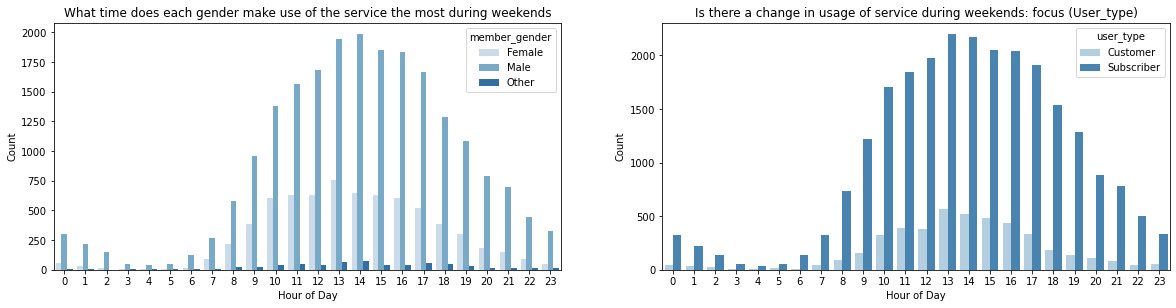

In [68]:
def weekendgender():

    tick_props = np.arange(0,prop.max(),0.1)
    tick_names =["{:0.2f}".format(v) for v  in tick_props]
    base_color = sb.color_palette()[0]

    plt.figure(figsize = [20,20])
    plt.subplot(3,2,1)
    sb.countplot(data=weekend_ride,x="member_gender",color = base_color)
    plt.title("Which gender make use of the service the most during weekends")
    plt.yticks(tick_props*weekend_ride["member_gender"].value_counts().sum(),tick_names)
    
    plt.subplot(3,2,2)
    sb.countplot(data=weekend_ride,x="boarding_hour",color=base_color)
    plt.xticks(rotation=45)
    plt.title("What time Day of does the service experience the most surge/request")


    ###################################

    plt.figure(figsize = [20,10])
    plt.subplot(2,2,1)   
    sb.countplot(data=weekend_ride, x='boarding_hour',hue="member_gender",palette="Blues");
    plt.xlabel('Hour of Day');
    plt.ylabel('Count');
    plt.title("What time does each gender make use of the service the most during weekends")
    
    plt.subplot(2,2,2)
    sb.countplot(data=weekend_ride, x='boarding_hour',hue="user_type",palette="Blues");
    plt.xlabel('Hour of Day');
    plt.ylabel('Count');
    plt.title("Is there a change in usage of service during weekends: focus (User_type)")

    ################################
    

weekendgender()

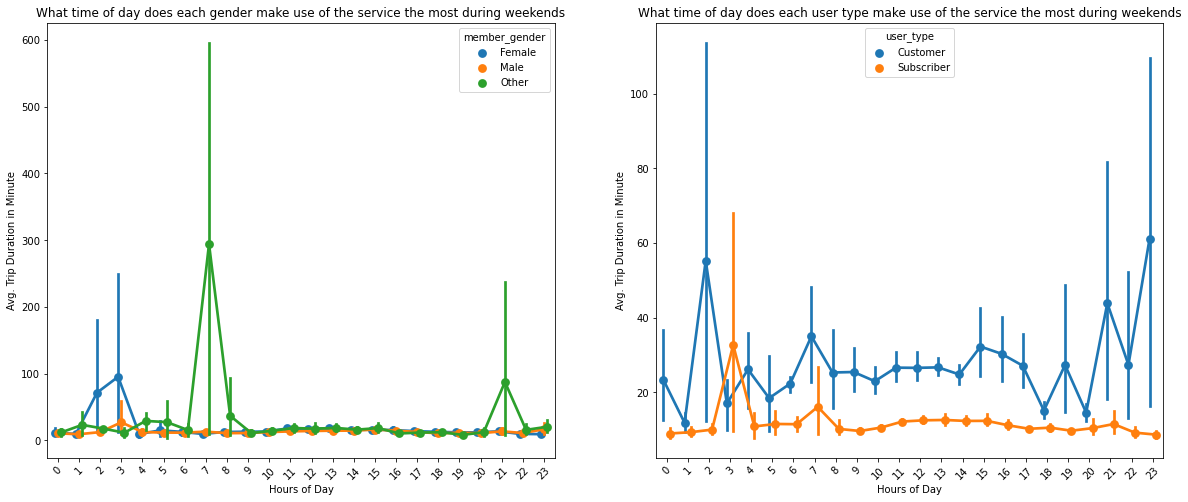

In [71]:
def more_visual_weekend():
    plt.figure(figsize = [20, 8])
    plt.subplot(1,2,1)
    sb.pointplot(data=weekend_ride, x='boarding_hour', y='travelTime_minutes', hue='member_gender', dodge=0.3, linestyles="-");
    plt.xlabel('Hours of Day');
    plt.ylabel('Avg. Trip Duration in Minute');
    plt.xticks(rotation=45)
    plt.title("What time of day does each gender make use of the service the most during weekends") 

    

    plt.subplot(1,2,2)
    sb.pointplot(data=weekend_ride, x='boarding_hour', y='travelTime_minutes', hue='user_type', dodge=0.3, linestyles="-");
    plt.xlabel('Hours of Day');
    plt.ylabel('Avg. Trip Duration in Minute');
    plt.xticks(rotation=45)
    plt.title("What time of day does each user type make use of the service the most during weekends") 
more_visual_weekend()

In [51]:
weekend_ride.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,year,month,days,boarding_hour,period_of_day,day_of_week,age,travelTime_minutes,travelTime_hours
29922,70925,2019-02-24 07:08:31.270,2019-02-25 02:50:36.590,375.0,Grove St at Masonic Ave,37.774836,-122.446546,71.0,Broderick St at Oak St,37.773063,...,No,2019,2,24,7,morning,Saturday,30,1182,19
29947,3788,2019-02-24 23:59:28.080,2019-02-25 01:02:36.220,99.0,Folsom St at 15th St,37.767037,-122.415442,386.0,24th St at Bartlett St,37.752105,...,Yes,2019,2,24,23,night,Saturday,38,63,1
29962,1080,2019-02-24 23:57:56.631,2019-02-25 00:15:57.338,189.0,Genoa St at 55th St,37.839649,-122.271756,339.0,Jackson St at 11th St,37.800002,...,No,2019,2,24,23,night,Saturday,29,18,0
29966,1131,2019-02-24 23:52:51.701,2019-02-25 00:11:43.648,133.0,Valencia St at 22nd St,37.755213,-122.420975,109.0,17th St at Valencia St,37.763316,...,No,2019,2,24,23,night,Saturday,39,18,0
29969,1667,2019-02-24 23:42:23.007,2019-02-25 00:10:10.068,249.0,Russell St at College Ave,37.858473,-122.253253,249.0,Russell St at College Ave,37.858473,...,No,2019,2,24,23,night,Saturday,21,27,0


In [50]:
youth_weekend_ride = weekend_ride[weekend_ride["age"].isin(np.arange(18,40,1))]

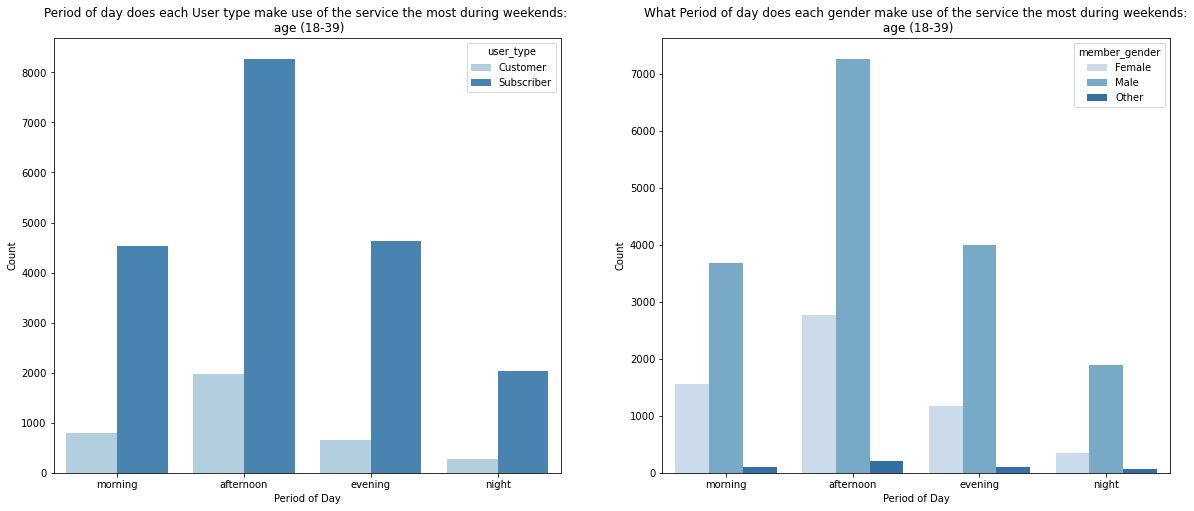

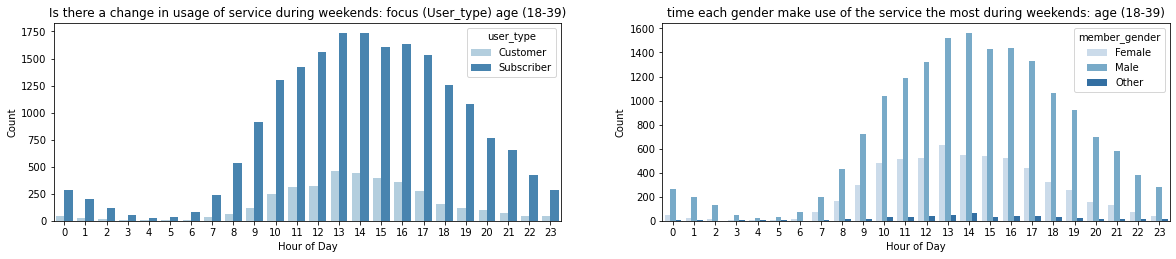

In [76]:
def youthweekendgender():
    
    plt.figure(figsize=[20,8])
    plt.subplot(1,2,1)
    sb.countplot(data=youth_weekend_ride, x='period_of_day',palette="Blues",hue="user_type", order=period);
    plt.xlabel('Period of Day');
    plt.ylabel('Count');
    plt.title("Period of day does each User type make use of the service the most during weekends: \n age (18-39)") 

    plt.subplot(1,2,2)
    sb.countplot(data=youth_weekend_ride, x='period_of_day',palette="Blues",hue="member_gender",order=period);
    plt.xlabel('Period of Day');
    plt.ylabel('Count');
    plt.title("What Period of day does each gender make use of the service the most during weekends:\n age (18-39)") 


    plt.figure(figsize = [20, 8])
    plt.subplot(2,2,1)
    sb.countplot(data=youth_weekend_ride, x='boarding_hour',hue="user_type",palette="Blues");
    plt.xlabel('Hour of Day');
    plt.ylabel('Count');
    plt.title("Is there a change in usage of service during weekends: focus (User_type) age (18-39)")

    plt.subplot(2,2,2)
    sb.countplot(data=youth_weekend_ride, x='boarding_hour',hue="member_gender",palette="Blues");
    plt.xlabel('Hour of Day');
    plt.ylabel('Count');
    plt.title("time each gender make use of the service the most during weekends: age (18-39)")   


youthweekendgender()

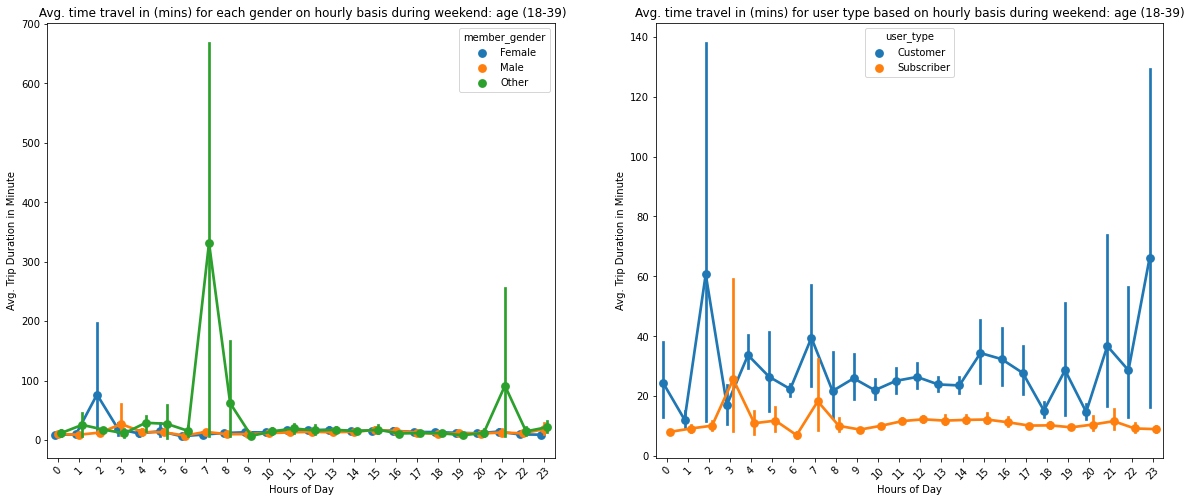

In [73]:
def more_Youth_weekend_rides():
    plt.figure(figsize = [20, 8])
    plt.subplot(1,2,1)
    sb.pointplot(data=youth_weekend_ride, x='boarding_hour', y='travelTime_minutes', hue='member_gender', dodge=0.3, linestyles="-");
    plt.xlabel('Hours of Day');
    plt.ylabel('Avg. Trip Duration in Minute');
    plt.xticks(rotation=45)
    plt.title(" Avg. time travel in (mins) for each gender on hourly basis during weekend: age (18-39)");
    

    plt.subplot(1,2,2)
    sb.pointplot(data=youth_weekend_ride, x='boarding_hour', y='travelTime_minutes', hue='user_type', dodge=0.3, linestyles="-");
    plt.xlabel('Hours of Day');
    plt.ylabel('Avg. Trip Duration in Minute');
    plt.xticks(rotation=45)
    plt.title("Avg. time travel in (mins) for user type based on hourly basis during weekend: age (18-39)");

more_Youth_weekend_rides()

- The user type feature looks skewed to the right showing users use the service more in the morning and afternoon than at night
- but the hourly usage is normally distributed. We can see that there seem to a normal distributed fig from 6am to 11pm
- Usage of the service peaked at 2pm using user_types i.e (whether a user is subscriber or not)
- Using gender the peak period is also 2pm in the afternoon

##### ***NB: hypothesis ;*** Older riders should experience a reverse of the trend we have been noticing

In [51]:
ride_old = ride_data[ride_data["age"] >= 60]

weekend_ride_old = ride_old[ride_old["day_of_week"].isin(['Friday', 'Saturday'])]
weekend_ride_old

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,year,month,days,boarding_hour,period_of_day,day_of_week,age,travelTime_minutes,travelTime_hours
30089,397,2019-02-24 22:12:17.173,2019-02-24 22:18:54.980,127.0,Valencia St at 21st St,37.756708,-122.421025,76.0,McCoppin St at Valencia St,37.771662,...,Yes,2019,2,24,22,night,Saturday,74,6,0
30329,198,2019-02-24 20:37:28.392,2019-02-24 20:40:46.840,175.0,49th St at Telegraph Ave,37.835946,-122.262366,210.0,45th St at Manila,37.833294,...,No,2019,2,24,20,evening,Saturday,68,3,0
30356,578,2019-02-24 20:22:18.170,2019-02-24 20:31:56.230,251.0,California St at University Ave,37.870555,-122.279720,251.0,California St at University Ave,37.870555,...,Yes,2019,2,24,20,evening,Saturday,63,9,0
30405,487,2019-02-24 20:06:13.706,2019-02-24 20:14:21.570,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,60.0,8th St at Ringold St,37.774520,...,No,2019,2,24,20,evening,Saturday,74,8,0
30453,673,2019-02-24 19:49:22.307,2019-02-24 20:00:35.751,24.0,Spear St at Folsom St,37.789677,-122.390428,79.0,7th St at Brannan St,37.773492,...,Yes,2019,2,24,19,evening,Saturday,76,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177035,779,2019-02-02 09:01:20.129,2019-02-02 09:14:19.222,230.0,14th St at Mandela Pkwy,37.810743,-122.291415,315.0,Market St at 45th St,37.834174,...,No,2019,2,2,9,morning,Friday,62,12,0
177114,324,2019-02-02 08:11:11.241,2019-02-02 08:16:35.327,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,200.0,2nd Ave at E 18th St,37.800214,...,No,2019,2,2,8,morning,Friday,60,5,0
177150,1685,2019-02-02 06:58:46.187,2019-02-02 07:26:51.784,61.0,Howard St at 8th St,37.776513,-122.411306,116.0,Mississippi St at 17th St,37.764802,...,No,2019,2,2,6,morning,Friday,62,28,0
177155,2820,2019-02-02 06:19:05.511,2019-02-02 07:06:06.446,131.0,22nd St at Dolores St,37.755000,-122.425728,41.0,Golden Gate Ave at Polk St,37.781270,...,No,2019,2,2,6,morning,Friday,61,47,0


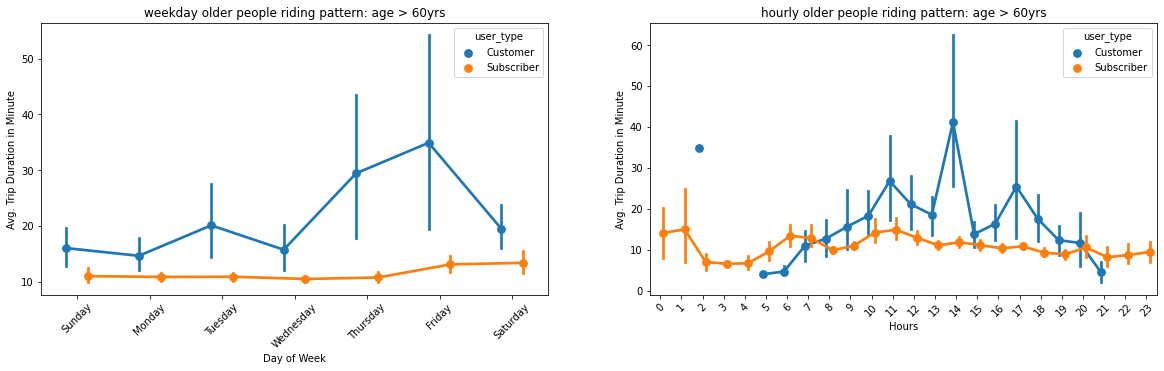

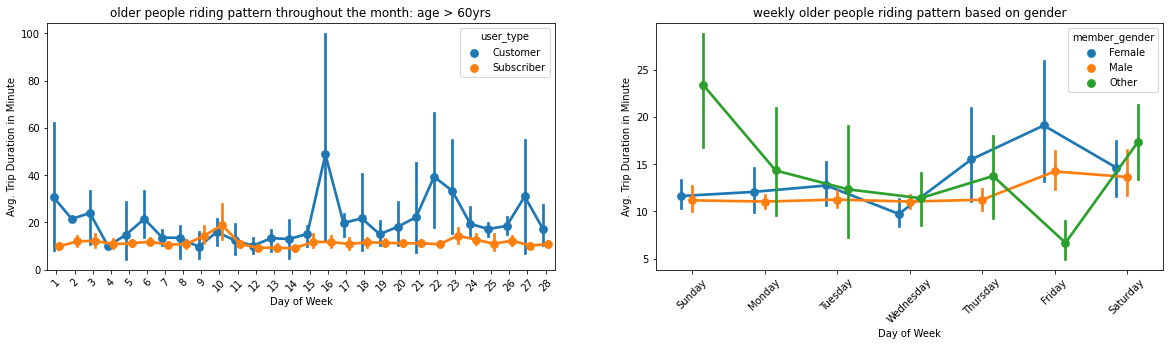

In [74]:
def oldriders():
       
    plt.figure(figsize = [20, 5])
    plt.subplot(1,2,1)
    sb.pointplot(data=ride_old, x='day_of_week', y='travelTime_minutes', hue='user_type', dodge=0.3, linestyles="-",order=weekday);
    plt.xlabel('Day of Week');
    plt.ylabel('Avg. Trip Duration in Minute');
    plt.xticks(rotation=45)
    plt.title("weekday older people riding pattern: age > 60yrs")
    
    plt.subplot(1,2,2)
    sb.pointplot(data=ride_old, x='boarding_hour', y='travelTime_minutes', hue='user_type', dodge=0.3, linestyles="-");
    plt.xlabel('Hours');
    plt.ylabel('Avg. Trip Duration in Minute');
    plt.xticks(rotation=45)
    plt.title("hourly older people riding pattern: age > 60yrs")

    plt.figure(figsize = [20, 10])
    plt.subplot(2,2,1)
    sb.pointplot(data=ride_old, x='days', y='travelTime_minutes', hue='user_type', dodge=0.3, linestyles="-");
    plt.xlabel('Day of Week');
    plt.ylabel('Avg. Trip Duration in Minute');
    plt.xticks(rotation=45)
    plt.title("older people riding pattern throughout the month: age > 60yrs")
      
    plt.subplot(2,2,2)
    sb.pointplot(data=ride_old, x='day_of_week', y='travelTime_minutes', hue='member_gender', dodge=0.3, linestyles="-",order=weekday);
    plt.xlabel('Day of Week');
    plt.ylabel('Avg. Trip Duration in Minute');
    plt.xticks(rotation=45)
    plt.title("weekly older people riding pattern based on gender: age > 60yrs")
   
    

oldriders()

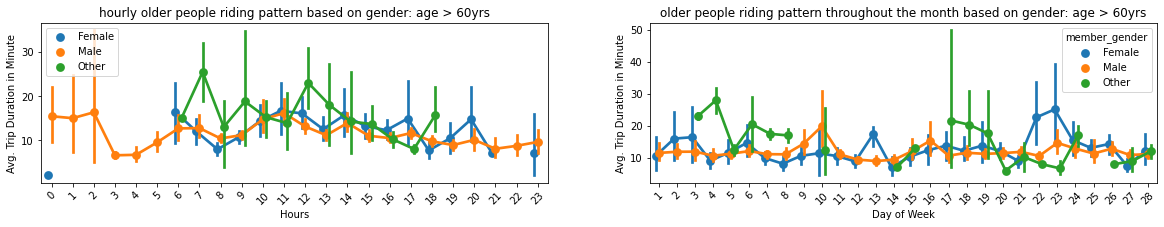

In [75]:
def more_from_old_riders():

    plt.figure(figsize = [20,10])
    plt.subplot(3,2,1)
    sb.pointplot(data=ride_old, x='boarding_hour', y='travelTime_minutes', hue='member_gender', dodge=0.3, linestyles="-");
    plt.xlabel('Hours');
    plt.ylabel('Avg. Trip Duration in Minute');
    plt.xticks(rotation=45)
    plt.title("hourly older people riding pattern based on gender: age > 60yrs")
    plt.legend(loc=2)

    
    plt.subplot(3,2,2)
    sb.pointplot(data=ride_old, x='days', y='travelTime_minutes', hue='member_gender', dodge=0.3, linestyles="-");
    plt.xlabel('Day of Week');
    plt.ylabel('Avg. Trip Duration in Minute');
    plt.xticks(rotation=45)
    plt.title("older people riding pattern throughout the month based on gender: age > 60yrs")
more_from_old_riders()

- older customers tend to spend far less time riding during weekends on like youth customers but older subcribers spend similar duration of time younger subcribers spend during weekend.
- there seem to be an odd value in the time old occassional customers use of the service at about 2am in the morning but usually these set people use the service from 5am to 9pm for occassional customers while subscribers use it throughout the day where subcribers stay with 20min travel time and occasional users sometimes go up to 60mins.
- on the entire month chart (last chart) where we need insight on how older users use the service. We can see that subscribers averagely spend about 15mins riding except from the 8th-10th but the cycle falls back to normal on the 11th


##### looking at their riding pattern using gender
- male users tend to use the platform more than other genders and throughout a day on like other genders that start using using the platform from 6am
- female users use the platform consistenly as male users but other gender aren't as consistent.
- other gender spend less time riding from thursday-friday than both male and female genders where male users i.e (sat-sun) looks exactly like that of the younger male users buth female users spend more time riding from wednesay- Friday.

##### The chart above will prompt more insight to how these use the service during the weekend by looking at the hourly and period features for riders >60yrs

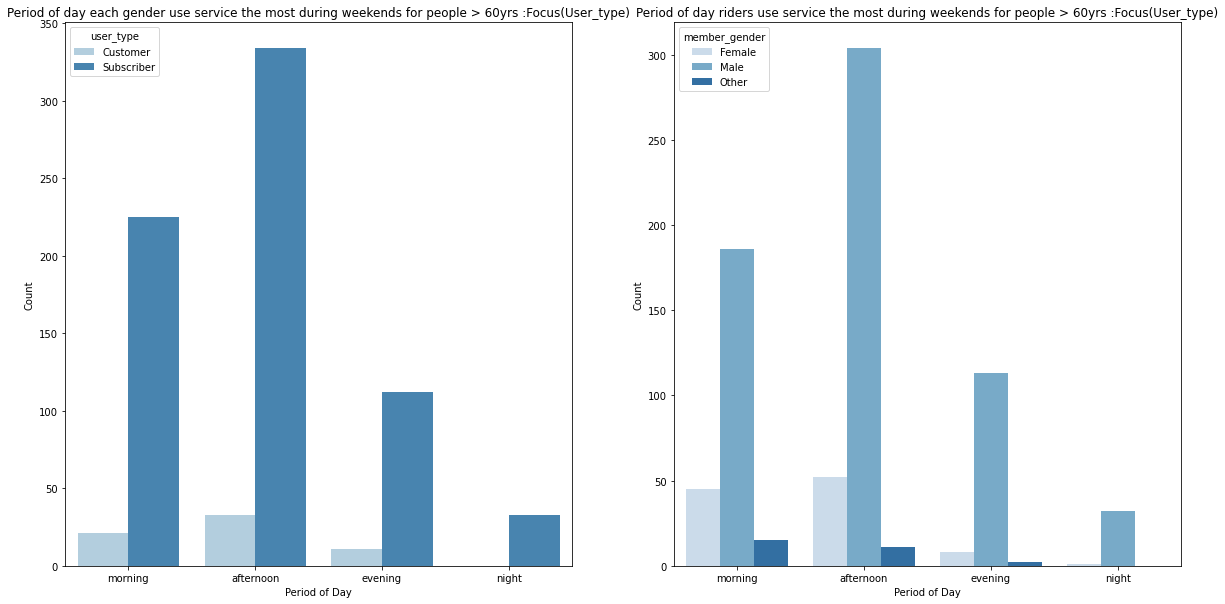

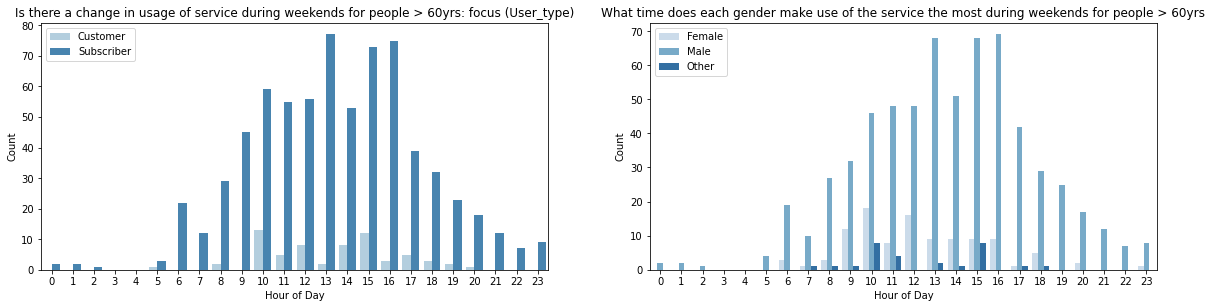

In [61]:
def olderWeekend():
    plt.figure(figsize = [20, 10])
    plt.subplot(1,2,1)
    sb.countplot(data=weekend_ride_old, x='period_of_day',palette="Blues",hue="user_type", order=period);
    plt.xlabel('Period of Day');
    plt.ylabel('Count');
    plt.title("Period of day each gender use service the most during weekends for people > 60yrs :Focus(User_type)")
   
    plt.subplot(1,2,2)
    sb.countplot(data=weekend_ride_old, x='period_of_day',palette="Blues",hue="member_gender",order=period);
    plt.xlabel('Period of Day');
    plt.ylabel('Count');
    plt.title("Period of day riders use service the most during weekends for people > 60yrs :Focus(User_type)")
   



    plt.figure(figsize = [20, 10])
    plt.subplot(2,2,1)
    sb.countplot(data=weekend_ride_old, x='boarding_hour',hue="user_type",palette="Blues");
    plt.xlabel('Hour of Day');
    plt.ylabel('Count');
    plt.title("Is there a change in usage of service during weekends for people > 60yrs: focus (User_type)")
    plt.legend(loc=2)


    plt.subplot(2,2,2)
    sb.countplot(data=weekend_ride_old, x='boarding_hour',hue="member_gender",palette="Blues");
    plt.xlabel('Hour of Day');
    plt.ylabel('Count');
    plt.title("What time does each gender make use of the service the most during weekends for people > 60yrs")
    plt.legend(loc=2)
   
    

olderWeekend()

In [65]:
night  = weekend_ride_old[weekend_ride_old["member_gender"] == "other"]
night

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,year,month,days,boarding_hour,period_of_day,day_of_week,age,travelTime_minutes,travelTime_hours


- though the olders riders are fewer than the younger riders we saw that other genders tend not to come out at night to use the service at all also using percentages on like young riders that rides a slightly more at night older riders use the more in the morning than evening during weekend.
- though we are examining older people from 60 years above we can see that there seem to a normal distributed fig from 6am to 11pm based on gender feature for all genders but even though the user type looks normally distributed yet there are time customers don't use the service at all like 6am-7am and from 8pm till 4am
- Usage of the service for older people peaked at 1pm  for subcribers and 10am for customers while male riders rode more at 1pm,3pm then finally peak at 4pm.


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,year,month,days,boarding_hour,period_of_day,day_of_week,age,travelTime_minutes,travelTime_hours


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> user within the ages of 18-40 spend about 10mins on average for both customers and subscribers in 24hrs
- on the weekly chart we can see that the youth trend is similar to that of the whole data where both subcribers and customers spend more travel time riding during the weekends
- throughout the month of february young subcribers spend about 10mins on riding to their destinations but customers are travel time is not constant.


### Were there any interesting or surprising interactions between features?

> People from 60 years above we can see that there seem to a normal distributed fig from 6am to 11pm based on gender feature for all genders but even though the user type looks normally distributed yet there are time customers don't use the service at all like 6am-7am and from 8pm till 4am
- Usage of the service for older people peaked at 1pm  for subcribers and 10am for customers.
- But using gender the peak period is 2pm in the afternoon for all gender.

<a id='Conclusions'></a>

## Conclusions
> With the above insight and plots, We can see huge variations of ride durations for the customers but this is not the case for the subscribers. <br/>My interpretation is that customers tend to be tourists or visitors that show up during the day to commute around town so the rides tend to be longer and mostly happen around noon. For the subscribers, it's more likely for them to live in the local area and commute daily depending on their work schedules. That's why there's no massive peak of trip duration time and the durations remain consistent (8am and 17pm) in the both young riders and older riders.<br/><br/>
> We can also deduce that most riders don't like to share their rides probably due to the fact that riders need to get to where need to get to in time.<br/><br/>
>  The weekend rides that tends to increase

## Limitations
There the dataset is enough to enable us build a machine learning solution that can enable us predict users travel_time from station to station. Though there are more but I  will limit it to the one stated.

## References
- python - How do I get the day of week given a date? - Stack Overflow https://stackoverflow.com/questions/9847213/how-do-i-get-the-day-of-week-given-a-date
- Parts of the Day: Early morning, late morning, etc. | Britannica Dictionary https://www.britannica.com/dictionary/eb/qa/parts-of-the-day-early-morning-late-morning-etc
- python pandas extract year from datetime: df['year'] = df['date'].year is not working - Stack Overflow https://stackoverflow.com/questions/30405413/python-pandas-extract-year-from-datetime-dfyear-dfdate-year-is-not-wo

In [37]:
ride_data.to_csv("new_main.csv")
ride_youth.to_csv("youth_riders.csv")
ride_old.to_csv("old_riders.csv")